In [1]:
## base packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns

## Load Data and Preprocessing

In [2]:
# load data from a csv file
# dataset source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_excel('default of credit card clients.xls')
# show raw data
print(df.head(3))

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  

[3 rows x 25 columns]


In [3]:
# preliminary preprocessing
df.columns=df.iloc[0]
df = df.iloc[1: , :]
df = df.drop(['ID'], axis=1)
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)


In [4]:
# rename columns and make them more meaningful
df.rename(columns={'default payment next month': 'y_default', 'PAY_0': 'PAY_1'}, inplace=True)

## replace EDUCATION values
#edu_d = {'graduate school': 1, 'university':2, 'high school':3,  'others':4,  'others':4, 'others':4, 'others':4}
edu_d = {1:'graduate school', 2:'university', 3:'high school',  4:'others',  5:'others', 6:'others', 0:'others'}

df = df.replace({'EDUCATION': edu_d})
edu_order = ['graduate school', 'university', 'high school', 'others']

## replace Y_DEFAULT values
#default_d = {1: 'default', 0: 'not default'}
default_d = {'default': 1, 'not default': 0}
df = df.replace({"y_default": default_d})

In [5]:
print(df.head(5))

0 LIMIT_BAL SEX   EDUCATION MARRIAGE AGE PAY_1 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
1     20000   2  university        1  24     2     2    -1    -1    -2  ...   
2    120000   2  university        2  26    -1     2     0     0     0  ...   
3     90000   2  university        2  34     0     0     0     0     0  ...   
4     50000   2  university        1  37     0     0     0     0     0  ...   
5     50000   1  university        1  57    -1     0    -1     0     0  ...   

0 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1         0         0         0        0      689        0        0        0   
2      3272      3455      3261        0     1000     1000     1000        0   
3     14331     14948     15549     1518     1500     1000     1000     1000   
4     28314     28959     29547     2000     2019     1200     1100     1069   
5     20940     19146     19131     2000    36681    10000     9000      689   

0 PAY_AMT6 y_default  
1        0         1 

In [6]:
## EDA
y_ori = df.y_default
X_ori = df.drop(['y_default'], axis=1)
print("\n-------feature types-------")
print(X_ori.dtypes)
print('\nfeature shapes: ', X_ori.shape)
print('\n-------dealing with missing data--------')
perc_missing_per_ftre = df.isnull().sum(axis = 0)/df.shape[0]
print("\n(nonzero) fraction of missing values for each feature:")
print(perc_missing_per_ftre[perc_missing_per_ftre > 0])

# print("\nr_days_from_arrest overview:")
# print(df['r_days_from_arrest'].value_counts())
# print("\ncustody_days overview:")
# print(df['custody_days'].value_counts())

# target variable
print('\n-------overview of target variable--------')
print(y_ori.value_counts())
#print(type(df.isnull().sum(axis = 0)))

# get unique races and genders in the dataset
# print('\n-------overview of age feature--------')
# print(df['AGE'].value_counts())



-------feature types-------
0
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_1        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
dtype: object

feature shapes:  (30000, 23)

-------dealing with missing data--------

(nonzero) fraction of missing values for each feature:
Series([], dtype: float64)

-------overview of target variable--------
0    23364
1     6636
Name: y_default, dtype: int64


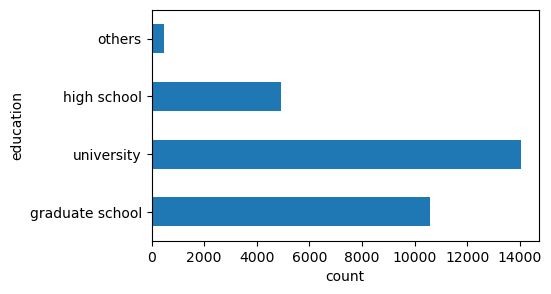

In [7]:
plt.figure(figsize=(5,3))
pd.value_counts(df['EDUCATION']).reindex(edu_order).plot.barh()
plt.ylabel('education')
plt.xlabel('count')
plt.show()

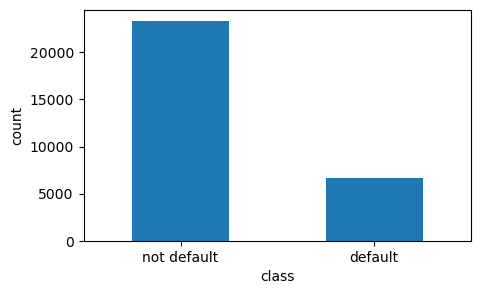

In [8]:
plt.figure(figsize=(5,3))
pd.value_counts(df['y_default']).plot.bar()
plt.ylabel('count')
plt.xlabel('class')
plt.xticks([0,1],['not default','default'], rotation='horizontal')
#plt.show()
plt.savefig('foo.png', bbox_inches='tight')

y_default               0         1
EDUCATION                          
graduate school  0.807652  0.192348
high school      0.748424  0.251576
others           0.929487  0.070513
university       0.762651  0.237349


<Figure size 300x100 with 0 Axes>

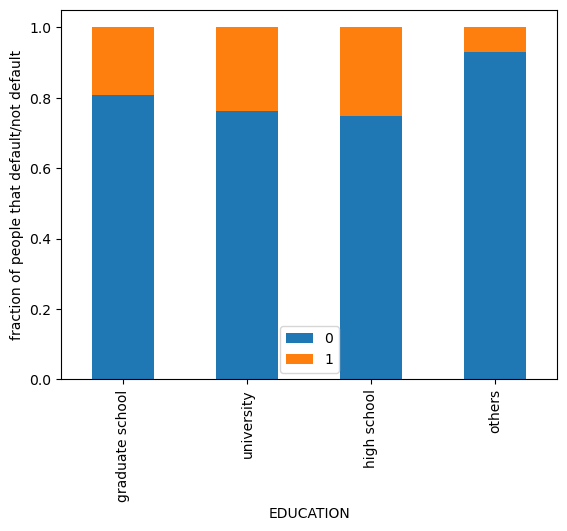

In [9]:
count_matrix = df.groupby(['EDUCATION', 'y_default']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
plt.figure(figsize=(3, 1))
count_matrix_norm.reindex(edu_order).plot(kind='bar', stacked=True)
plt.ylabel('fraction of people that default/not default')
plt.legend(loc=0)
plt.show()

In [10]:
df.AGE = df.AGE.astype(float)
#df.EDUCATION = df.EDUCATION.astype(float)
df.PAY_1 = df.PAY_1.astype(float)
df.PAY_2 = df.PAY_2.astype(float)
df.PAY_3 = df.PAY_3.astype(float)
df.PAY_4 = df.PAY_4.astype(float)
df.PAY_5 = df.PAY_5.astype(float)
df.PAY_6 = df.PAY_6.astype(float)

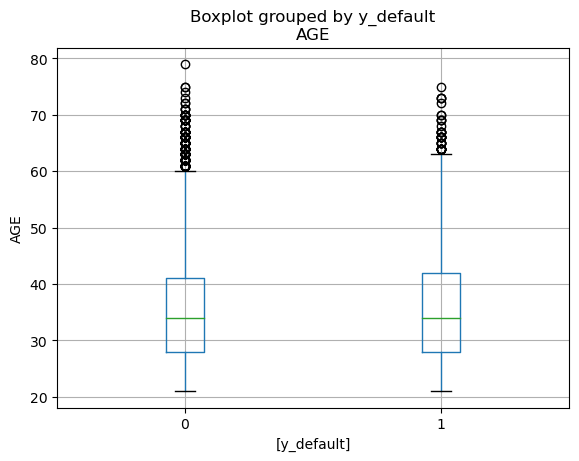

In [11]:
df[['AGE','y_default']].boxplot(by='y_default')
plt.ylabel('AGE')
plt.show()

[array([34., 37., 57., ..., 38., 39., 43.]), array([24., 26., 30., ..., 37., 41., 46.])]


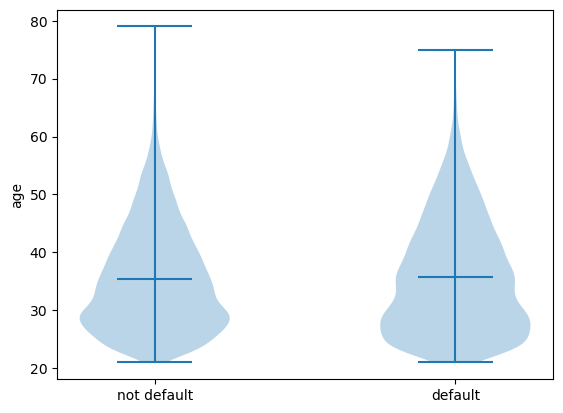

In [13]:
# age
dataset = [df[df['y_default']==0]['AGE'].values,
           df[df['y_default']==1]['AGE'].values]
print(dataset)
plt.violinplot(dataset = dataset, showmeans = True)
plt.xticks([1,2],['not default','default'])
plt.ylabel('age')
plt.show()

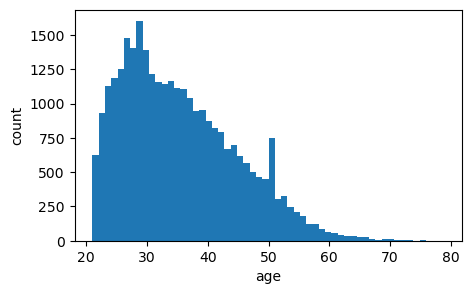

In [14]:
plt.figure(figsize=(5,3))

df['AGE'].plot.hist(bins = df['AGE'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [15]:
def draw_histograms(df, correct_order, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #df[var_name].hist(bins=n_bins,ax=ax)
        #pd.value_counts(df['default']).plot.bar()
        pd.value_counts(df[var_name]).reindex(correct_order).plot.bar(ax=ax)
        plt.ylabel('count')
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.savefig('prev_pay.png')
    
#bills = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
#draw_histograms(bills, bills.columns, 2, 3, 20)

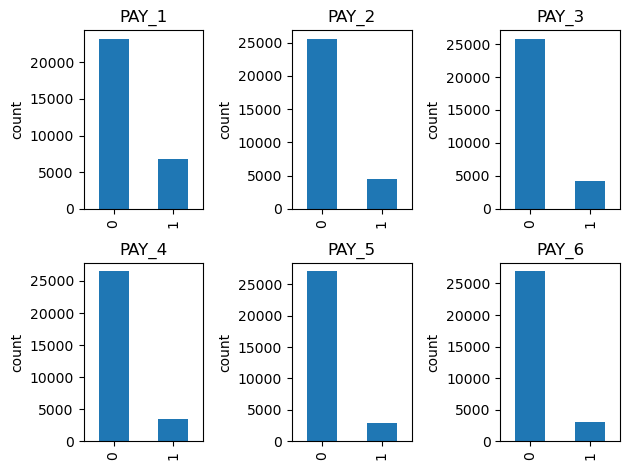

In [16]:
## make PAY_N a binary categorical variable 
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

fil = df.PAY_1 > 0
df.loc[fil, 'PAY_1'] = 1
fil = df.PAY_2 > 0
df.loc[fil, 'PAY_2'] = 1
fil = df.PAY_3 > 0
df.loc[fil, 'PAY_3'] = 1
fil = df.PAY_4 > 0
df.loc[fil, 'PAY_4'] = 1
fil = df.PAY_5 > 0
df.loc[fil, 'PAY_5'] = 1
fil = df.PAY_6 > 0
df.loc[fil, 'PAY_6'] = 1
late_pay = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
correct_order = [0, 1]
draw_histograms(late_pay, correct_order, late_pay.columns, 2, 3, 10)

In [17]:
df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
   "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "LIMIT_BAL"]] = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
   "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "LIMIT_BAL"]].apply(pd.to_numeric)

0          LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4  \
0                                                                        
LIMIT_BAL   1.000000  0.144713 -0.157742 -0.199823 -0.194145 -0.185079   
AGE         0.144713  1.000000 -0.003073 -0.009968 -0.015263 -0.007899   
PAY_1      -0.157742 -0.003073  1.000000  0.668176  0.430527  0.371030   
PAY_2      -0.199823 -0.009968  0.668176  1.000000  0.625247  0.478977   
PAY_3      -0.194145 -0.015263  0.430527  0.625247  1.000000  0.625660   
PAY_4      -0.185079 -0.007899  0.371030  0.478977  0.625660  1.000000   
PAY_5      -0.173792 -0.016556  0.348587  0.443047  0.482382  0.662637   
PAY_6      -0.171731 -0.020613  0.309867  0.397391  0.434247  0.496443   
BILL_AMT1   0.285430  0.056239 -0.056238  0.005936 -0.022620 -0.020869   
BILL_AMT2   0.278314  0.054283 -0.045264  0.009481 -0.001617 -0.007069   
BILL_AMT3   0.283236  0.053710 -0.037456  0.017775  0.001792  0.009373   
BILL_AMT4   0.293988  0.051353 -0.0279

<AxesSubplot:xlabel='0', ylabel='0'>

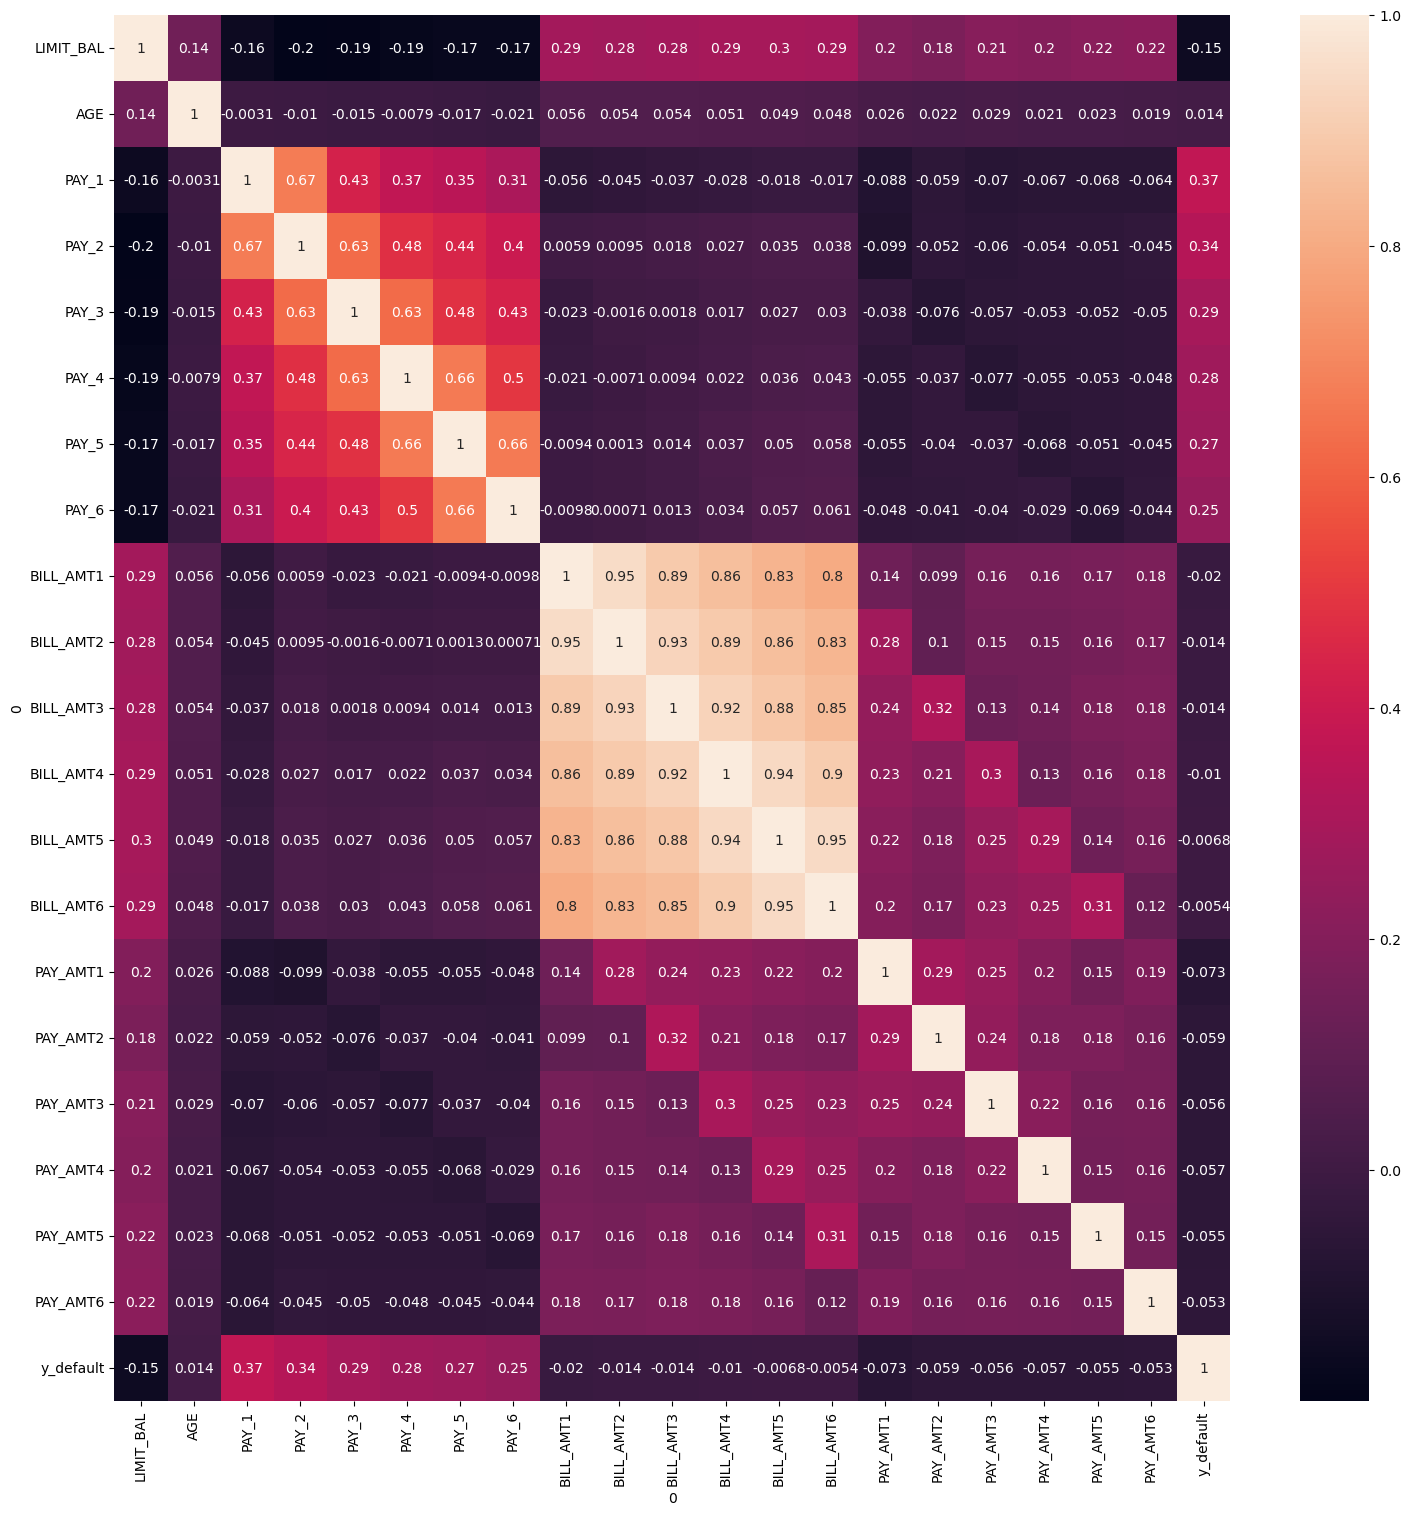

In [18]:
corr = df.corr()
print(corr)
# plot the heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True, annot_kws={"size":10})


In [19]:
df.PAY_3.value_counts()

0.0    25787
1.0     4213
Name: PAY_3, dtype: int64

In [20]:
print(df['PAY_1'].value_counts())

0.0    23182
1.0     6818
Name: PAY_1, dtype: int64


In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid, GridSearchCV, KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost

In [22]:
# we hope to predict who is likely going to default and who's not
y = df['y_default'] 
X = df.loc[:, df.columns != 'y_default']
X = X.reset_index(drop = True)

In [23]:
random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)


In [24]:
print(X_train)

0      LIMIT_BAL SEX        EDUCATION MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  \
2758      200000   2  graduate school        2  23.0    0.0    0.0    0.0   
11337     120000   1  graduate school        2  38.0    0.0    0.0    0.0   
23149     280000   2       university        2  37.0    0.0    0.0    0.0   
19039      30000   2  graduate school        2  26.0    1.0    1.0    1.0   
10802     450000   2  graduate school        2  30.0    0.0    0.0    0.0   
...          ...  ..              ...      ...   ...    ...    ...    ...   
29802      50000   1       university        2  32.0    0.0    0.0    0.0   
5390      200000   1  graduate school        2  37.0    1.0    1.0    1.0   
860        50000   1  graduate school        2  26.0    0.0    0.0    0.0   
15795      70000   2       university        2  25.0    0.0    0.0    0.0   
23654     160000   2       university        1  36.0    0.0    0.0    0.0   

0      PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
275

In [25]:
X_train.EDUCATION.value_counts()

university         8380
graduate school    6424
high school        2917
others              279
Name: EDUCATION, dtype: int64

In [26]:
# needs to be done manually
ordinal_ftrs = ['EDUCATION', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
ordinal_cats = [['graduate school', 'university', 'high school', 'others'],
               [0, 1], 
               [0, 1], 
               [0, 1], 
               [0, 1], 
               [0, 1], 
               [0, 1]]
onehot_ftrs = ['SEX', 'MARRIAGE']
minmax_ftrs = ['AGE']
std_ftrs = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', \
            'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(18000, 23)
(18000, 27)
[[ 0.          0.          0.         ... -0.30532333 -0.18394356
  -0.288013  ]
 [ 0.          0.          0.         ...  0.56416294 -0.05379964
  -0.13318135]
 [ 1.          0.          0.         ... -0.18881217 -0.18675242
   0.28441367]
 ...
 [ 0.          0.          0.         ... -0.30532333 -0.30347623
  -0.29364324]
 [ 1.          0.          0.         ... -0.23079593 -0.30347623
  -0.22608034]
 [ 1.          0.          0.         ... -0.20284816  0.58287566
  -0.20918961]]


## Model

### Main Architecture

In [29]:
def MLpipe_KFold_F1(X, y, preprocessor, ml_algo, param_grid, tuning = True):
    random_state = 5
    val_scores = np.zeros(random_state)
    test_scores = np.zeros(random_state)
    best_models = []
    X_test_set = []
    y_test_set = []
    
    for i in range(random_state):
    
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size = 0.8, stratify = y, random_state = 42*i)
        
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)
        pipeline = Pipeline(
            steps = [('preprocessor', preprocessor), ('classifier', ml_algo)])
        grid = GridSearchCV(
            pipeline, param_grid = param_grid, cv = kf, return_train_score = True, scoring = 'f1')
        print('----- Training with random state '+str(i)+' -----')
#         if use_xgb:
#             grid.fit(X_train, y_train, classifier__early_stopping_rounds=50)
        grid.fit(X_train, y_train)
        
        results = pd.DataFrame(grid.cv_results_)
        estimator = grid.best_estimator_
        best_params = grid.best_params_
        
        X_test_set.append(X_test)
        y_test_set.append(y_test)
        X_pred = grid.predict(X_test)
        score = f1_score(y_test, grid.predict(X_test))
        val_scores[i] = grid.best_score_
        test_scores[i] = score
        best_models.append(estimator)
        if tuning:
            print('best model parameters:',grid.best_params_)
            print('val score (f1):', grid.best_score_)
            print('test score (f1):',score)
        
    #feature_names = grid.best_estimator_[-1].get_feature_names_out()
        
    return best_models, test_scores, X_test_set, y_test_set

In [28]:
print(f'The mean of the test scores is {np.mean(knn_scores)} and the standard deviation is {np.std(knn_scores)}.')

NameError: name 'knn_scores' is not defined

### Different Models with the Architecture

In [30]:
## KNN Classifier

knn_param_grid = {
    'classifier__n_neighbors': [3,6,9,15]  
}

knn = KNeighborsClassifier()
knn_models, knn_scores, knn_X_test_set, knn_y_test_set = MLpipe_KFold_F1(X, y, preprocessor, knn, knn_param_grid, tuning = True)
#knn_models[1][0].get_feature_names_out()
print(f'The mean of the test scores is {np.mean(knn_scores)} and the standard deviation is {np.std(knn_scores)}.')

----- Training with random state 0 -----
best model parameters: {'classifier__n_neighbors': 9}
val score (f1): 0.4069832667914177
test score (f1): 0.41318248893261195
----- Training with random state 1 -----
best model parameters: {'classifier__n_neighbors': 9}
val score (f1): 0.4187963342456735
test score (f1): 0.42160611854684515
----- Training with random state 2 -----
best model parameters: {'classifier__n_neighbors': 9}
val score (f1): 0.40869984241112434
test score (f1): 0.4309603440038222
----- Training with random state 3 -----
best model parameters: {'classifier__n_neighbors': 15}
val score (f1): 0.4059260485770168
test score (f1): 0.4251968503937008
----- Training with random state 4 -----
best model parameters: {'classifier__n_neighbors': 9}
val score (f1): 0.40666631844414547
test score (f1): 0.4041196665031878
The mean of the test scores is 0.41901309367603357 and the standard deviation is 0.00941816903804194.


In [35]:
## Logistic Regression 
logreg_param_grid = {
    "classifier__C":np.logspace(-3,3,6), 
    "classifier__penalty":["l2"]
}

logreg = LogisticRegression()
logreg_models, logreg_scores, logreg_X_test_set, logreg_y_test_set = MLpipe_KFold_F1(X, y, preprocessor, logreg, logreg_param_grid, tuning = True)

print(f'The mean of the test scores is {np.mean(logreg_scores)} and the standard deviation is {np.std(logreg_scores)}.')

----- Training with random state 0 -----
best model parameters: {'classifier__C': 63.0957344480193, 'classifier__penalty': 'l2'}
val score (f1): 0.4040198771858205
test score (f1): 0.402088772845953
----- Training with random state 1 -----
best model parameters: {'classifier__C': 63.0957344480193, 'classifier__penalty': 'l2'}
val score (f1): 0.40864474387788774
test score (f1): 0.40020523345305287
----- Training with random state 2 -----
best model parameters: {'classifier__C': 63.0957344480193, 'classifier__penalty': 'l2'}
val score (f1): 0.4030401131486147
test score (f1): 0.41059602649006627
----- Training with random state 3 -----
best model parameters: {'classifier__C': 63.0957344480193, 'classifier__penalty': 'l2'}
val score (f1): 0.4042326282093693
test score (f1): 0.4196157735085946
----- Training with random state 4 -----
best model parameters: {'classifier__C': 63.0957344480193, 'classifier__penalty': 'l2'}
val score (f1): 0.4059026402374628
test score (f1): 0.397715472481827

In [36]:
## XGBoost
xgb_param_grid = {
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth": [1,3,6, 10],
    "classifier__reg_lambda": [1e-1, 2, 1e1],
}

xgb = xgboost.XGBClassifier(eval_metric = 'logloss')
xgb_models, xgb_scores, xgb_X_test_set, xgb_y_test_set = MLpipe_KFold_F1(X, y, preprocessor, xgb, xgb_param_grid)

print(f'The mean of the test scores is {np.mean(xgb_scores)} and the standard deviation is {np.std(xgb_scores)}.')

----- Training with random state 0 -----
best model parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__reg_lambda': 10.0}
val score (f1): 0.4944653547107286
test score (f1): 0.5069204152249135
----- Training with random state 1 -----
best model parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__reg_lambda': 10.0}
val score (f1): 0.5018572753374861
test score (f1): 0.4861111111111111
----- Training with random state 2 -----
best model parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__reg_lambda': 10.0}
val score (f1): 0.49398760936079666
test score (f1): 0.5015027908973808
----- Training with random state 3 -----
best model parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__reg_lambda': 10.0}
val score (f1): 0.49584605763284995
test score (f1): 0.5053533190578159
----- Training with random state 4 -----
best model parameters: {'classifi

In [37]:
## SVC
svc_param_grid = {
    'classifier__C': [1], 
    'classifier__gamma': [0.1]
}

svc = SVC()
svc_models, svc_scores, svc_X_test_set, svc_y_test_set = MLpipe_KFold_F1(X, y, preprocessor, svc, svc_param_grid)

print(f'The mean of the test scores is {np.mean(svc_scores)} and the standard deviation is {np.std(svc_scores)}.')

----- Training with random state 0 -----
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
val score (f1): 0.4447024430726443
test score (f1): 0.44955044955044954
----- Training with random state 1 -----
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
val score (f1): 0.4578302163230641
test score (f1): 0.4484261501210654
----- Training with random state 2 -----
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
val score (f1): 0.448575938543961
test score (f1): 0.45813282001924927
----- Training with random state 3 -----
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
val score (f1): 0.4451941321870647
test score (f1): 0.45938104448742745
----- Training with random state 4 -----
best model parameters: {'classifier__C': 1, 'classifier__gamma': 0.1}
val score (f1): 0.44361041959848607
test score (f1): 0.44157135753356536
The mean of the test scores is 0.4514123643423515 and the standard deviation is 0.0066

In [54]:
## the test set for all the models should be the same since they all used the same random states
def compute_baseline(y_test):
    r = y_test.value_counts(normalize=True)[1]
    return 2*r/(r+1)

#print(compute_baseline(svc_y_test_set[0]))
baselines = [compute_baseline(y_test) for y_test in svc_y_test_set]
base_mean, base_std = np.mean(baselines), np.around(np.std(baselines), 5)

In [59]:
#base_mean, base_std
print(compute_baseline(svc_y_test_set[4]))

0.362221918929985


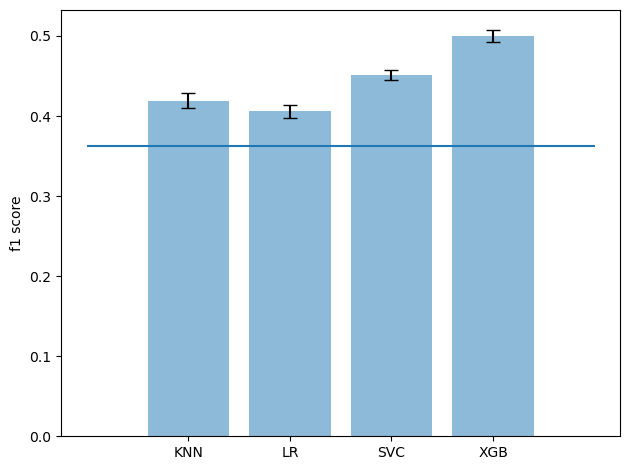

In [60]:
# Build the plot
fig, ax = plt.subplots()
x_pos = ['KNN', 'LR', 'SVC', 'XGB']
means = [np.mean(knn_scores), np.mean(logreg_scores), np.mean(svc_scores), np.mean(xgb_scores)]
stds = [np.std(knn_scores), np.std(logreg_scores), np.std(svc_scores), np.std(xgb_scores)]
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('f1 score')
ax.set_xticks(x_pos)
ax.hlines(y=base_mean, xmin=-1, xmax=len(x_pos))

#ax.set_xticklabels(['materials'])
#ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

## Results

[0      LIMIT_BAL SEX        EDUCATION MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  \
 20553      80000   1  graduate school        2  28.0    0.0    0.0    0.0   
 6695      300000   2  graduate school        2  43.0    1.0    0.0    0.0   
 28997     450000   2      high school        2  40.0    0.0    0.0    0.0   
 2232       80000   2  graduate school        2  25.0    0.0    0.0    0.0   
 4165       50000   1       university        1  51.0    0.0    0.0    0.0   
 ...          ...  ..              ...      ...   ...    ...    ...    ...   
 25641     360000   2  graduate school        2  36.0    0.0    0.0    0.0   
 16907     100000   1  graduate school        1  35.0    1.0    0.0    0.0   
 1236       50000   1       university        2  27.0    1.0    1.0    0.0   
 3013      180000   2  graduate school        2  28.0    0.0    0.0    0.0   
 16808     110000   1       university        1  38.0    0.0    0.0    0.0   
 
 0      PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BI

### Confusion Matrix

In [72]:
ftr_names
#xgb_models[-1][-1]

array(['ord__EDUCATION', 'ord__PAY_1', 'ord__PAY_2', 'ord__PAY_3',
       'ord__PAY_4', 'ord__PAY_5', 'ord__PAY_6', 'onehot__SEX_1',
       'onehot__SEX_2', 'onehot__MARRIAGE_0', 'onehot__MARRIAGE_1',
       'onehot__MARRIAGE_2', 'onehot__MARRIAGE_3', 'minmax__AGE',
       'std__LIMIT_BAL', 'std__BILL_AMT1', 'std__BILL_AMT2',
       'std__BILL_AMT3', 'std__BILL_AMT4', 'std__BILL_AMT5',
       'std__BILL_AMT6', 'std__PAY_AMT1', 'std__PAY_AMT2',
       'std__PAY_AMT3', 'std__PAY_AMT4', 'std__PAY_AMT5', 'std__PAY_AMT6'],
      dtype=object)

In [66]:
#test_sets = [df_i.loc[:, df_i.columns != 'predicted_two_year_recid'] for df_i in xgb_X_test_set]
# print(test_sets[0])
print(xgb_X_test_set[0])

#test_sets for the best models - XGBoost
y_test_preds = []
#results_p3 = [df_i for df_i in test_sets]
# make predictions for each test sets and save the results to y_test_predictions
for i in range(5):
    y_pred = xgb_models[i].predict(xgb_X_test_set[i])
    y_test_preds.append(y_pred)

    #results_p3[i]['predicted_two_year_recid'] = pd.Series(y_pred)

y_test_preds = [pd.Series(pred) for pred in y_test_preds]
y_test_true = [pd.Series(tr) for tr in xgb_y_test_set]
xgb_X_tests = pd.concat([pd.DataFrame(xgb_x) for xgb_x in xgb_X_test_set])
y_test_preds = pd.concat(y_test_preds)
y_test_true = pd.concat(xgb_y_test_set)
#xgb_X_tests = pd.concat(xgb_X_tests)

## transform the test sets
#ftr_names = df_test.columns
ftr_names = xgb_models[1][0].get_feature_names_out()
df_test = preprocessor.transform(xgb_X_tests)
df_test = pd.DataFrame(data=df_test,columns = ftr_names)

0      LIMIT_BAL SEX        EDUCATION MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  \
20553      80000   1  graduate school        2  28.0    0.0    0.0    0.0   
6695      300000   2  graduate school        2  43.0    1.0    0.0    0.0   
28997     450000   2      high school        2  40.0    0.0    0.0    0.0   
2232       80000   2  graduate school        2  25.0    0.0    0.0    0.0   
4165       50000   1       university        1  51.0    0.0    0.0    0.0   
...          ...  ..              ...      ...   ...    ...    ...    ...   
25641     360000   2  graduate school        2  36.0    0.0    0.0    0.0   
16907     100000   1  graduate school        1  35.0    1.0    0.0    0.0   
1236       50000   1       university        2  27.0    1.0    1.0    0.0   
3013      180000   2  graduate school        2  28.0    0.0    0.0    0.0   
16808     110000   1       university        1  38.0    0.0    0.0    0.0   

0      PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
205

In [67]:
y_test_preds

0       0
1       1
2       0
3       0
4       0
       ..
5995    1
5996    0
5997    0
5998    0
5999    0
Length: 30000, dtype: int64

Overall accuracy of the model:  0.8061666666666667
F1 score:  0.4984907287623976


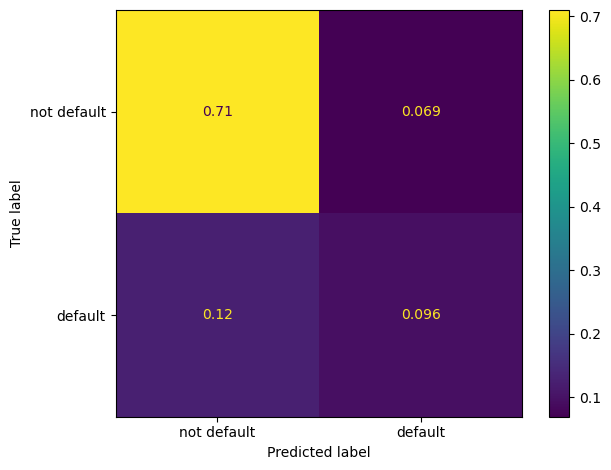

In [68]:
# overall accuracy and confusion matrix
print('Overall accuracy of the model: ', accuracy_score(y_test_true[-6000:], y_test_preds[-6000:]))
print('F1 score: ', f1_score(y_test_true[-6000:], y_test_preds[-6000:]))
cm_overall = confusion_matrix(y_test_true[-6000:], y_test_preds[-6000:], normalize =  'all')
cm_overall_d = ConfusionMatrixDisplay(cm_overall,display_labels=['not default', 'default'])
cm_overall_d.plot()
plt.tight_layout()
plt.savefig("conf_mat.png")

In [243]:
df_test

,ord__EDUCATION,ord__PAY_1,ord__PAY_2,ord__PAY_3,ord__PAY_4,ord__PAY_5,ord__PAY_6,onehot__SEX_1,onehot__SEX_2,onehot__MARRIAGE_0,...,std__BILL_AMT3,std__BILL_AMT4,std__BILL_AMT5,std__BILL_AMT6,std__PAY_AMT1,std__PAY_AMT2,std__PAY_AMT3,std__PAY_AMT4,std__PAY_AMT5,std__PAY_AMT6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.052191,-0.111530,-0.131306,-0.401777,-0.182186,-0.133379,-0.147551,-0.237007,-0.241057,-0.237341
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.674727,-0.657516,-0.664489,-0.654262,-0.189116,-0.230528,-0.232269,-0.305323,-0.297921,-0.293643
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.096411,-0.446293,-0.368258,-0.332759,1.217143,1.880479,0.554222,0.348530,0.323025,2.439895
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.674727,-0.586922,-0.610506,-0.440996,-0.326560,-0.230528,0.020002,-0.100870,0.495926,-0.259862
4,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,-0.306943,-0.284916,-0.100642,-0.097566,-0.037813,0.150748,-0.285979,0.315738,-0.303476,0.269381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.549588,-0.518901,-0.487505,-0.481154,-0.257261,-0.230528,-0.213110,-0.231231,-0.303476,-0.293643
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.672754,-0.656710,-0.659307,-0.648202,-0.268811,-0.222902,-0.219533,-0.268060,-0.266025,-0.259862
29997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.149368,2.111691,2.126015,2.103281,1.125610,6.825315,0.219947,0.099174,0.012240,0.044171
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.425735,-0.443395,-0.470992,-0.289243,0.082249,0.036365,-0.009123,-0.305323,0.435005,0.438288


### Perturbation Feature Importance 

In [257]:
xgb_models[-1][-1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
#ftr_names = df_test.columns
ftr_names = xgb_models[1][0].get_feature_names_out()

np.random.seed(42)

nr_runs = 10
perm_scores = np.zeros([len(ftr_names),nr_runs])

test_score = f1_score(y_test_true, y_test_preds)
print('test score = ',test_score)
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    perm_f1_scores = []
    for j in range(nr_runs):
        X_test_shuffled = df_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(df_test[ftr_names[i]].values)
        perm_f1_scores.append(f1_score(y_test_true, xgb_models[-1][-1].predict(X_test_shuffled)))
    print('   shuffled test score:',np.around(np.mean(perm_f1_scores),3),'+/-',np.around(np.std(perm_f1_scores),3))
    perm_scores[i] = perm_f1_scores

test score =  0.49969824984912486
shuffling ord__EDUCATION
   shuffled test score: 0.501 +/- 0.0
shuffling ord__PAY_1
   shuffled test score: 0.199 +/- 0.004
shuffling ord__PAY_2
   shuffled test score: 0.501 +/- 0.0
shuffling ord__PAY_3
   shuffled test score: 0.501 +/- 0.0
shuffling ord__PAY_4
   shuffled test score: 0.498 +/- 0.0
shuffling ord__PAY_5
   shuffled test score: 0.501 +/- 0.0
shuffling ord__PAY_6
   shuffled test score: 0.5 +/- 0.0
shuffling onehot__SEX_1
   shuffled test score: 0.501 +/- 0.0
shuffling onehot__SEX_2
   shuffled test score: 0.501 +/- 0.0
shuffling onehot__MARRIAGE_0
   shuffled test score: 0.501 +/- 0.0
shuffling onehot__MARRIAGE_1
   shuffled test score: 0.501 +/- 0.0
shuffling onehot__MARRIAGE_2
   shuffled test score: 0.501 +/- 0.0
shuffling onehot__MARRIAGE_3
   shuffled test score: 0.501 +/- 0.0
shuffling minmax__AGE
   shuffled test score: 0.501 +/- 0.0
shuffling std__LIMIT_BAL
   shuffled test score: 0.501 +/- 0.0
shuffling std__BILL_AMT1
   shuffl

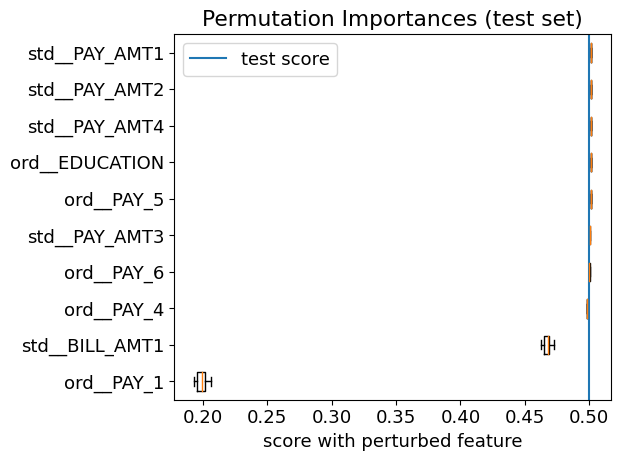

In [70]:
sorted_indcs = np.argsort(np.mean(perm_scores,axis=1))#[::-1]
top_10_indcs = sorted_indcs[:10]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(6.4,4.8))
plt.boxplot(perm_scores[top_10_indcs].T,labels=ftr_names[top_10_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('perm_importance.png')

In [ ]:
# xgb_metrics = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']


# for metric in xgb_metrics:
#     m_dict = XGB.get_booster().get_score(importance_type= metric)
#     m_dict = sorted(m_dict.items(), key = lambda x: x[1])
#     ftr = list(zip(*m_dict[-10:]))[0]
#     importance = list(zip(*m_dict[-10:]))[1]
    
#     plt.title('top 10 most important features for ' + metric)
#     plt.barh(np.arange(10), importance,align='center')
#     plt.yticks(np.arange(10), ftr) 
#     plt.xlabel('feature importance')
#     plt.show()

### XGBoost Feature Importance

None
None
None
None
None


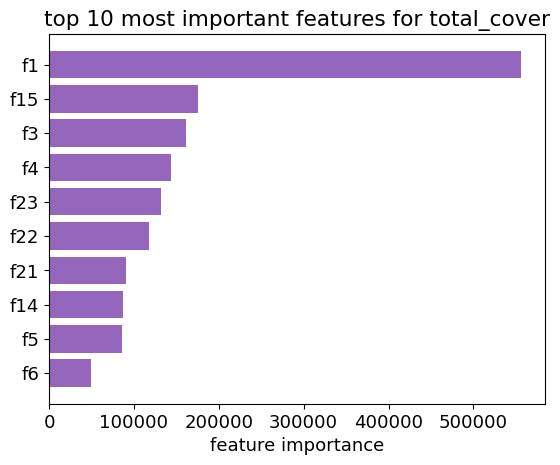

In [80]:
xgb_metrics = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
ftr_name_list = ['ord__EDUCATION', 'ord__PAY_1', 'ord__PAY_2', 'ord__PAY_3',
       'ord__PAY_4', 'ord__PAY_5', 'ord__PAY_6', 'onehot__SEX_1',
       'onehot__SEX_2', 'onehot__MARRIAGE_0', 'onehot__MARRIAGE_1',
       'onehot__MARRIAGE_2', 'onehot__MARRIAGE_3', 'minmax__AGE',
       'std__LIMIT_BAL', 'std__BILL_AMT1', 'std__BILL_AMT2',
       'std__BILL_AMT3', 'std__BILL_AMT4', 'std__BILL_AMT5',
       'std__BILL_AMT6', 'std__PAY_AMT1', 'std__PAY_AMT2',
       'std__PAY_AMT3', 'std__PAY_AMT4', 'std__PAY_AMT5']# 'std__PAY_AMT6']

for metric in xgb_metrics:
    m_dict = xgb_models[-1][-1].get_booster().get_score(importance_type= metric)
    #name = xgb_models[-1][-1].get_booster().feature_names
    print(name)
    #m_dict_res = [{k: next(iter(v.values()))} for k, v in zip(ftr_name_list, m_dict)]
    m_dict = sorted(m_dict.items(), key = lambda x: x[1])
    ftr = list(zip(*m_dict[-10:]))[0]
    #print(list(zip(*m_dict[-10:])))
    importance = list(zip(*m_dict[-10:]))[1]
    
    plt.title('top 10 most important features for ' + metric)
    plt.barh(np.arange(10), importance,align='center')
    plt.yticks(np.arange(10), ftr) 
    plt.xlabel('feature importance')
    plt.savefig('xgb_feature_importance.png')
    #plt.show()

### Feature Importance with SHAP

In [81]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(xgb_models[-1][-1])
# transform the test set
#X_test_transformed = preprocessor.transform(X_test)
np_test = np.array(df_test)
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(np_test[:1000])
print(np.shape(shap_values))

(1000, 27)


In [83]:
np_test = np.array(df_test)
np_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.23700655,
        -0.24105708, -0.23734082],
       [ 0.        ,  1.        ,  0.        , ..., -0.30532333,
        -0.29792093, -0.29364324],
       [ 2.        ,  0.        ,  0.        , ...,  0.34853035,
         0.32302475,  2.43989538],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.09917411,
         0.01223982,  0.04417126],
       [ 0.        ,  0.        ,  0.        , ..., -0.30532333,
         0.4350047 ,  0.43828817],
       [ 2.        ,  0.        ,  0.        , ..., -0.08795176,
        -0.24105708, -0.23734082]])

In [87]:
index = 6 # the index of the point to explain
print(explainer.expected_value) # we explain class 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], features = np_test[index,:],feature_names = ftr_names, matplotlib=True, show = False)
plt.savefig('shap_local.png', bbox_inches='tight')

-0.7517932


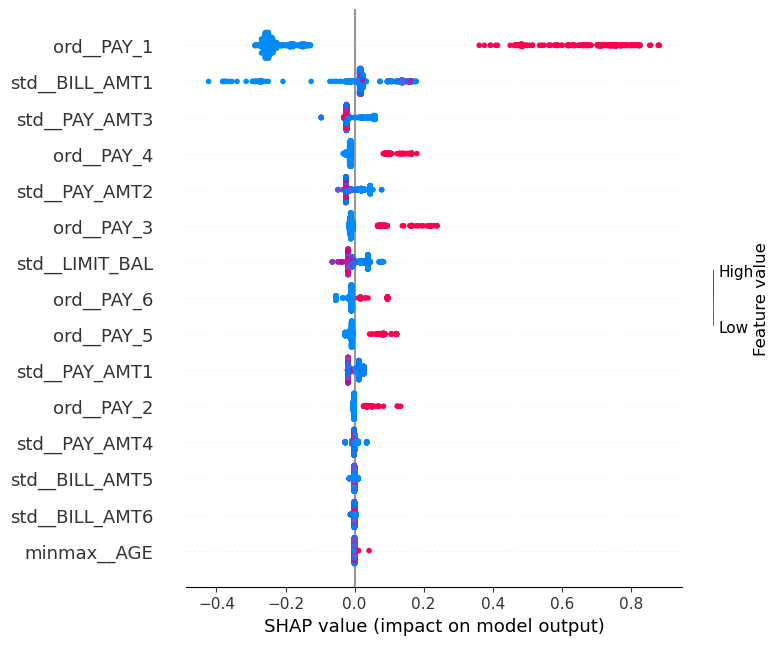

In [286]:
shap.summary_plot(shap_values, np_test[:1000], feature_names = ftr_names, max_display=15, show = False)
plt.savefig('shap_summary.png', bbox_inches='tight')

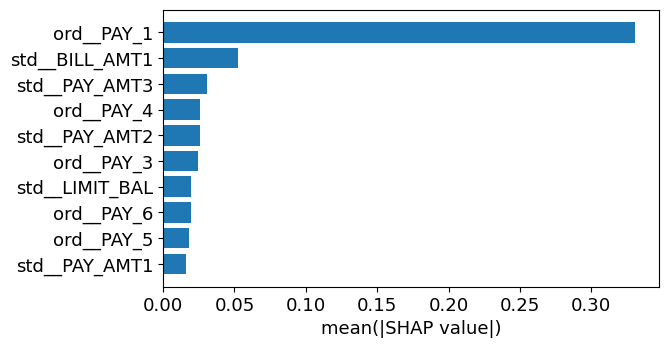

In [275]:
shap_summary = np.abs(shap_values).mean(0) # same shape as the number of features
indcs = np.argsort(shap_summary)
shap_summary[indcs]

plt.figure(figsize=(6.4,3.6))
plt.barh(ftr_names[indcs[-10:]],shap_summary[indcs[-10:]])
plt.xlabel('mean(|SHAP value|)')
plt.show()

## Ethical Component??

In [85]:
index = 42 # the index of the point to explain
print(explainer.expected_value) # we explain class 0 predictions
shap.force_plot(explainer.expected_value, np_test[:1000], features = X_test_transformed[index,:],feature_names = ftr_names,)

-0.7517932


NameError: name 'X_test_transformed' is not defined